<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/Case_RLS_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contexto

O Ministério da Educação solicitou novamente a você uma previsão do percentual de alunos que serão aprovados no ano de 2017, tendo como base o ano de 2016.

Crie um modelo que consiga prever o valor de aprovação em 2016 com as aprovações de 2015.

Faça todo o tratamento de dados aprendido e faça a regressão linear com Sklearn, normalize a base de dados e analise as métricas de R^2, MAE, MSE e RMSE do modelo

# Etapa 1: Análise Descritiva e Exploratória dos Dados

A análise descritiva inicial é crucial para entender a natureza dos dados com os quais estamos trabalhando. Utilizamos pandas para carregar e inspecionar os dados, verificar tipos de dados e valores ausentes. O describe() fornece um resumo estatístico que é fundamental para ter uma visão inicial da distribuição dos dados, identificar possíveis valores discrepantes (outliers) e verificar a consistência dos dados.

O uso de seaborn para histogramas ajuda a visualizar a distribuição de cada variável e identificar características como assimetria e curtose. Complementarmente, a matriz de correlação gerada oferece uma visão da relação linear entre variáveis. Isso é essencial para entender as dependências e as potenciais multicolinearidades que podem afetar o modelo de regressão.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.preprocessing import MinMaxScaler

In [2]:
dados = pd.read_excel('/content/aprovacao_alunos.xlsx')

In [3]:
dados.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [4]:
dados.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ano_2015  27 non-null     int64
 1   ano_2016  27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


<Axes: xlabel='ano_2015', ylabel='Count'>

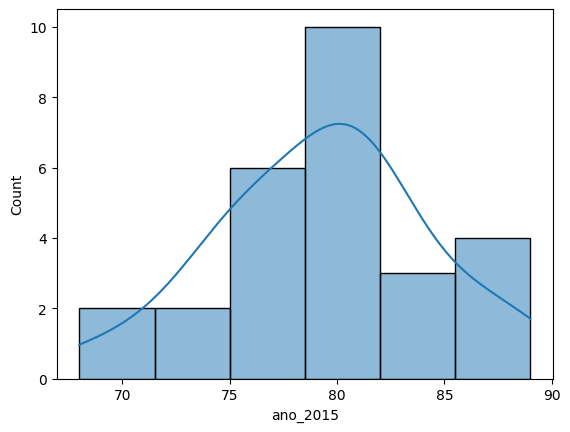

In [6]:
sns.histplot(dados['ano_2015'], kde=True)

<Axes: xlabel='ano_2016', ylabel='Count'>

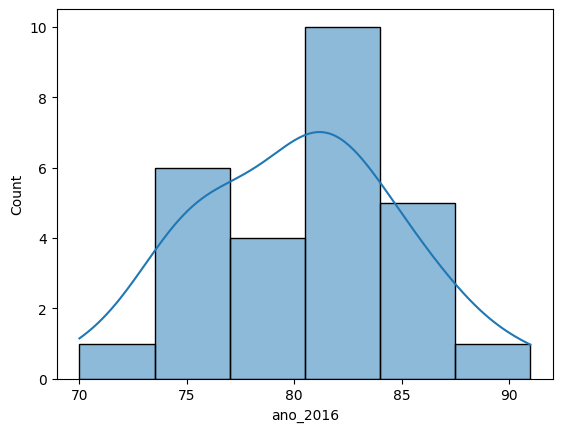

In [7]:
sns.histplot(dados['ano_2016'], kde=True)

- Verificando a correlação entre as características

In [9]:
dados.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


<Axes: >

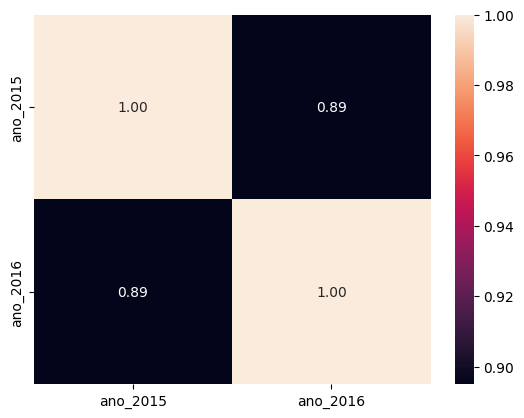

In [8]:
sns.heatmap(dados.corr(), annot=True, fmt=".2f")

- Plotagem do gráfico de dispersão para a relação entre as aprovações de 2015 e 2016

<Axes: xlabel='ano_2015', ylabel='ano_2016'>

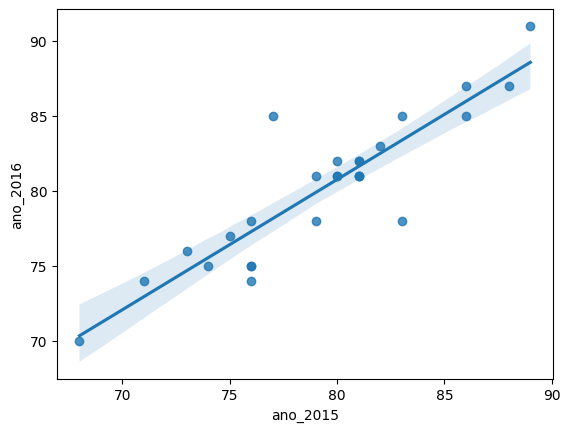

In [10]:
sns.regplot(x='ano_2015', y='ano_2016', data=dados)

# Etapa 2: Preparação dos Dados

Normalização dos dados é uma etapa preparatória vital antes da modelagem estatística ou de machine learning. A normalização (ou escalonamento) ajusta a escala dos dados sem alterar a forma da distribuição. Isso é importante porque muitos algoritmos de machine learning, como regressão linear, assumem que todos os recursos estão centrados em torno de zero e têm uma variação na mesma ordem de magnitude. O MinMaxScaler do sklearn é uma escolha comum para essa tarefa, já que escala os dados para um intervalo definido, geralmente [0, 1].

In [12]:
# Normalização dos dados
scaler = MinMaxScaler()

# Selecionando as colunas para normalização
dados_norm = pd.DataFrame(scaler.fit_transform(dados), index=dados.index, columns=dados.columns)

# Visualizando os dados normalizados
dados_norm.head()

,ano_2015,ano_2016
0,0.428571,0.714286
1,0.523810,0.523810
2,0.714286,0.714286
3,0.619048,0.571429
4,0.238095,0.285714


In [13]:
function = "ano_2016~ano_2015"
model = smf.ols(formula=function, data=dados_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 17 Jan 2024   Prob (F-statistic):           3.02e-10
Time:                        21:06:13   Log-Likelihood:                 23.726
No. Observations:                  27   AIC:                            -43.45
Df Residuals:                      25   BIC:                            -40.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0165      0.051      0.324      0.7

- Etapa 3: Construção e Avaliação do Modelo de Regressão Linear

A escolha da regressão linear como modelo preditivo é adequada quando temos uma relação linear entre a variável dependente e as variáveis independentes. O LinearRegression do sklearn é uma implementação do modelo de regressão linear, que minimiza a soma dos quadrados dos resíduos (a diferença entre o valor observado e o valor predito pelo modelo) para ajustar a melhor linha aos dados.

Após treinar o modelo, utilizamos o coeficiente de determinação R² para medir o quão bem o modelo se ajusta aos dados. Um R² próximo de 1 indica que o modelo explica uma grande proporção da variância na variável dependente. Contudo, é importante considerar outras métricas de erro para uma avaliação mais completa.

O Erro Absoluto Médio (MAE) mede a média dos erros sem considerar sua direção. O Erro Quadrático Médio (MSE) é uma medida mais rigorosa, penalizando mais fortemente os erros maiores. A Raiz do Erro Quadrático Médio (RMSE) é ainda mais interpretável, pois está na mesma unidade da variável dependente, tornando-se uma métrica útil para comparar modelos.

Por fim, é crucial validar o modelo com um conjunto de teste para garantir que as previsões se generalizam bem para novos dados. Isso ajuda a evitar problemas de overfitting, onde o modelo se ajusta muito bem ao conjunto de treino, mas falha em prever novos dados com precisão.

In [14]:
# Definição das variáveis independente e dependente
X = dados_norm[['ano_2015']]
y = dados_norm[['ano_2016']]

# Divisão dos dados em conjunto de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Construção do modelo de regressão linear
lr = LinearRegression()

In [15]:
# Treinamento do modelo com os dados de treino
lr.fit(X_treino, y_treino)

# Coeficiente de determinação R^2 do modelo
r_sq = lr.score(X_treino, y_treino)
print(f"Coeficiente de determinação R^2: {r_sq}")

Coeficiente de determinação R^2: 0.8800910056640281


In [16]:
# Previsões com os dados de treino
y_pred_treino = lr.predict(X_treino)

# Métricas de erro para os dados de treino
print("MAE (Erro Absoluto Médio):", metrics.mean_absolute_error(y_treino, y_pred_treino))
print("MSE (Erro Quadrático Médio):", metrics.mean_squared_error(y_treino, y_pred_treino))
print("RMSE (Raiz do Erro Quadrático Médio):", np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))

MAE (Erro Absoluto Médio): 0.06313092719197842
MSE (Erro Quadrático Médio): 0.006947385853516443
RMSE (Raiz do Erro Quadrático Médio): 0.08335097991935334


In [17]:
# Previsões com os dados de teste
y_pred_teste = lr.predict(X_teste)

# Métricas de erro para os dados de teste
print("MAE (Erro Absoluto Médio):", metrics.mean_absolute_error(y_teste, y_pred_teste))
print("MSE (Erro Quadrático Médio):", metrics.mean_squared_error(y_teste, y_pred_teste))
print("RMSE (Raiz do Erro Quadrático Médio):", np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))

MAE (Erro Absoluto Médio): 0.10156392395533688
MSE (Erro Quadrático Médio): 0.02234792217796548
RMSE (Raiz do Erro Quadrático Médio): 0.14949221443929941
